In [141]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [142]:
def clean_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    Pipeline làm sạch dữ liệu tổng quát cho bảng kim cương hoặc dataset tương tự.
    """
    # Xóa dòng trùng lặp
    data = data.drop_duplicates().copy()
    
    # Xóa dòng có giá trị thiếu trong các cột quan trọng
    data = data.dropna(subset=['cut', 'color', 'clarity'])
    
    # Chuyển kiểu dữ liệu đúng
    numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = pd.to_numeric(data[col], errors='coerce')  # lỗi → NaN
    data = data.dropna(subset=numeric_cols)
    
    #  Loại bỏ outliers (IQR)
    # for col in ['carat', 'depth', 'table', 'price']:
    #     Q1, Q3 = data[col].quantile([0.25, 0.75])
    #     IQR = Q3 - Q1
    #     data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]
    
    # Loại giá trị không hợp lệ (logic)
    if 'depth' in data.columns:
        data = data[data['depth'] <= 100]
    if 'carat' in data.columns:
        data = data[data['carat'] > 0]
    
    # Mã hóa thứ bậc cho 3 cột phân loại
    cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
    color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
    clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

    encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories])

    data[['cut', 'color', 'clarity']] = encoder.fit_transform(data[['cut', 'color', 'clarity']])
    
    # Reset lại chỉ mục
    data.reset_index(drop=True, inplace=True)
    
    return data


In [143]:
data = pd.read_csv('diamonds.csv')
data.drop(data.columns[0], axis=1, inplace=True)

In [144]:
data = clean_data(data)

# Xem kết quả
print(data.head())
print(data.info())

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23  4.0    5.0      1.0   61.5   55.0    326  3.95  3.98  2.43
1   0.21  3.0    5.0      2.0   59.8   61.0    326  3.89  3.84  2.31
2   0.23  1.0    5.0      4.0   56.9   65.0    327  4.05  4.07  2.31
3   0.29  3.0    1.0      3.0   62.4   58.0    334  4.20  4.23  2.63
4   0.31  1.0    0.0      1.0   63.3   58.0    335  4.34  4.35  2.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  float64
 2   color    53794 non-null  float64
 3   clarity  53794 non-null  float64
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(9), i

In [145]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53789,0.72,4.0,6.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,1.0,6.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,2.0,6.0,2.0,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,3.0,2.0,1.0,61.0,58.0,2757,6.15,6.12,3.74


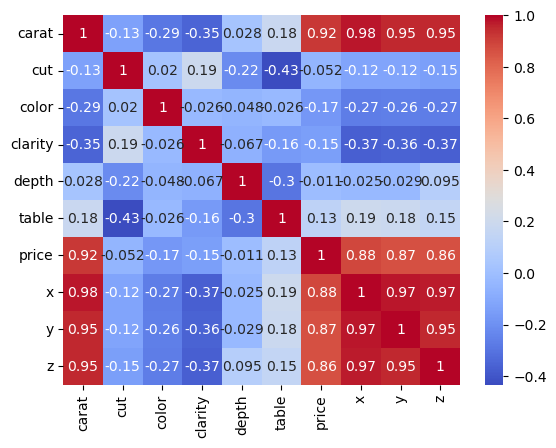

In [146]:
# sns.pairplot(data)
# plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()